# Naive Bayes Algorithm
- Naive Bayes is a probabilistic machine learning algorithm based on the Bayes Theorem, used in a wide variety of classification tasks.
- Conditional probability is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion, or evidence) occurred.

### The Formula is: 

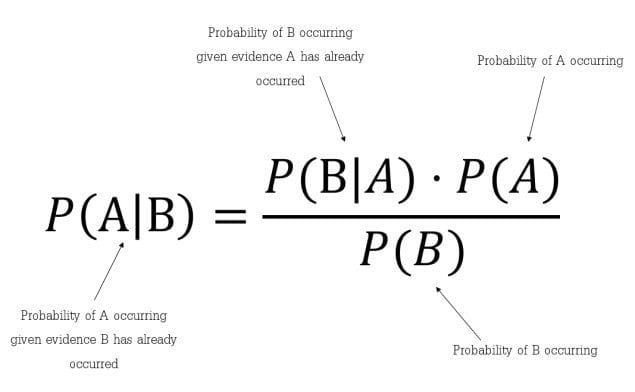

#### Which tells us: how often A happens given that B happens, written P(A|B) also called posterior probability, When we know: how often B happens given that A happens, written P(B|A) and how likely A is on its own, written P(A) and how likely B is on its own, written P(B).

### In simpler terms, Bayes’ Theorem is a way of finding a probability when we know certain other probabilities.

## Assumptions Made by Naïve Bayes

 
The fundamental Naïve Bayes assumption is that each feature makes an:

    independent
    equal


### Naive Bayes Example

- Let us take an example to get some better intuition. Consider the car theft problem with attributes Color, Type, Origin, and the target, Stolen can be either Yes or No.
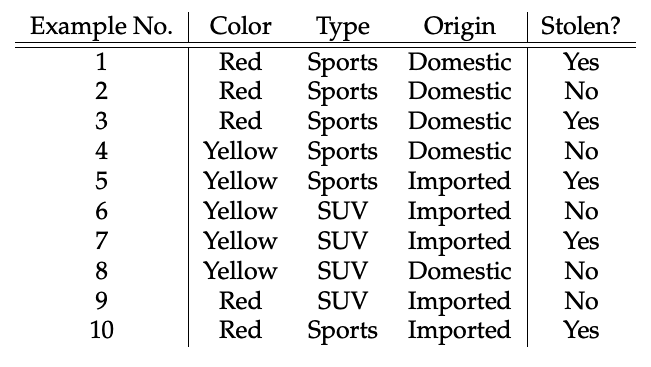


Concerning our dataset, the concept of assumptions made by the algorithm can be understood as:

- We assume that no pair of features are dependent. For example, the color being ‘Red’ has nothing to do with the Type or the Origin of the car. Hence, the features are assumed to be Independent.
- Secondly, each feature is given the same influence(or importance). For example, knowing the only Color and Type alone can’t predict the outcome perfectly. So none of the attributes are irrelevant and assumed to be contributing Equally to the outcome.


### We will use titanic survival dataset here and using naive bayes classifier find out the survival probability of titanic travellers. We use sklearn library and python for this beginners machine learning tutorial. GaussianNB is the classifier we use to train our model.

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn





In [3]:
# Load csv file 
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
df.shape

(891, 12)

Name, Passengerid, sibsp, parch really doesn't affect the dataset. so i am going to drop it.

In [7]:
df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)

In [8]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [41]:
# let's seperate the target column
target = df.Survived
input = df.drop('Survived', axis=1)

In [42]:
dummies = pd.get_dummies(input.Sex) # dummies basically convert sex column into two different column, male and female.
dummies.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [43]:
#  Lets concat the dummies and input and drop sex column.

inputs = pd.concat([input, dummies], axis=1)
inputs.drop('Sex', axis=1, inplace=True)

inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [44]:
# Check null

inputs.isnull().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

It seems age has 177 null value

we can fill it using mean of age.

In [45]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.sample(20)

,Pclass,Age,Fare,female,male
72,2,21.000000,73.5000,False,True
32,3,29.699118,7.7500,True,False
6,1,54.000000,51.8625,False,True
497,3,29.699118,15.1000,False,True
335,3,29.699118,7.8958,False,True
64,1,29.699118,27.7208,False,True
514,3,24.000000,7.4958,False,True
143,3,19.000000,6.7500,False,True
678,3,43.000000,46.9000,True,False
464,3,29.699118,8.0500,False,True


In [46]:
inputs.isnull().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

NO null value, good to go

In [47]:
# Split the data set into training and testing dataset.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size= 0.2, random_state=42)

In [48]:
len(x_train)

712

In [49]:
target.shape

(891,)

In [50]:
# import Gaussan distribution

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [52]:
model.fit(x_train, y_train)

GaussianNB()

In [56]:
model.score(x_test, y_test)

0.776536312849162

We have accuracy of nearly 80%, so our model is performing well.

In [57]:
x_test[:5]

,Pclass,Age,Fare,female,male
709,3,29.699118,15.2458,False,True
439,2,31.000000,10.5000,False,True
840,3,20.000000,7.9250,False,True
720,2,6.000000,33.0000,True,False
39,3,14.000000,11.2417,True,False


In [58]:
y_test[:5]

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [59]:
# let's predict
model.predict(x_test[:5])

array([0, 0, 0, 1, 1])